In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/(CSV FILES) Global COVID-19 Impact CSV FILES/online-payments.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
#removed uneessary stuff and added new features
df = df.drop(["nameOrig", "nameDest"], axis=1)

# Add balance difference features
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

#cibverted 'type' column to true/false values
df = pd.get_dummies(df, columns=["type"], drop_first=True)

#check null values
print(df.isnull().sum())
df

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
errorBalanceOrig    0
errorBalanceDest    0
type_CASH_OUT       0
type_DEBIT          0
type_PAYMENT        0
type_TRANSFER       0
dtype: int64


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0.0,9.839640e+03,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0.0,1.864280e+03,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0.0,1.810000e+02,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0.0,2.136300e+04,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0.0,1.166814e+04,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0.0,0.000000e+00,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0.0,6.311409e+06,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0.0,1.000000e-02,True,False,False,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0.0,8.500025e+05,False,False,False,True


In [ ]:
import matplotlib.pyplot as plt
fraud_count = df['isFraud'].value_counts()
print("Fraudulent Transactions: ")
print(fraud_count)

#make pie chart of this (fraudulent transactions (before balancing))
#balance dataset for testing and training
#make pie chart of this (fraudulent transactions (after balancing))

Fraudulent Transactions: 
isFraud
0    6354407
1       8213
Name: count, dtype: int64


Class distribution before sampling:
isFraud
0    4448056
1       5778
Name: count, dtype: int64


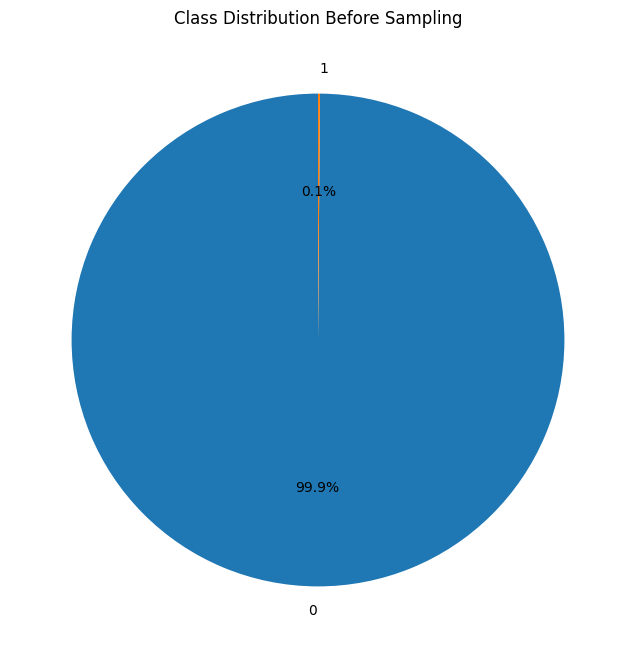

Class distribution after hybrid sampling (Undersampling + ADASYN):
IsFraud
0    500000
1    499750
Name: count, dtype: int64


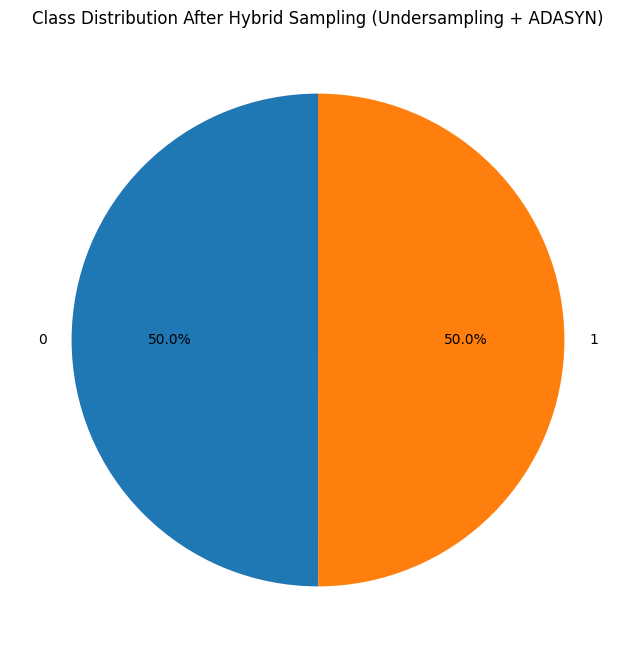

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Assuming df is already loaded and cleaned as in the previous steps
# If not, you might need to add the loading/cleaning steps here or ensure they are run before this cell.
# For now, assuming df is available.

x = df.drop("isFraud", axis=1)
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Implement hybrid sampling
# Randomly undersample the non-fraud class down to 500k
undersampler = RandomUnderSampler(sampling_strategy={0: 500000}, random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Then apply ADASYN to reach a specific ratio (e.g., 1:5)
# Calculate the desired number of minority samples for a 1:5 ratio
n_minority_under = y_train_under.value_counts()[1] # Number of fraud samples after undersampling
n_majority_under = y_train_under.value_counts()[0] # Number of non-fraud samples after undersampling

# Ensure desired_minority_after_adasyn is at least n_minority_under
desired_minority_after_adasyn = max(n_minority_under, int(n_majority_under / 1)) # Aim for 1:5 ratio or keep current minority count

adasyn = ADASYN(sampling_strategy={1: desired_minority_after_adasyn}, random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_under, y_train_under)

X_train_resampled = pd.DataFrame(X_train_resampled, columns=x.columns)
y_train_resampled = pd.Series(y_train_resampled, name='IsFraud')

print("Class distribution before sampling:")
print(y_train.value_counts())

#pie chart for class distribution before sampling
plt.figure(figsize=(8, 8))
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution Before Sampling')
plt.show()

print("Class distribution after hybrid sampling (Undersampling + ADASYN):")
print(y_train_resampled.value_counts())

#pie chart for class distribution after hybrid sampling
plt.figure(figsize=(8, 8))
plt.pie(y_train_resampled.value_counts(), labels=y_train_resampled.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution After Hybrid Sampling (Undersampling + ADASYN)')
plt.show()

In [ ]:
# GRADIENT BOOSTING CLASSIFIER (WITH CLASS WEIGHTS + PR THRESHOLD TUNING) - SINGLE RUN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, average_precision_score, f1_score
)
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import time
import matplotlib.pyplot as plt

n_train_per_class = 200000  # how many rows per class to use for training (tweakable)

# ensure indices exist (defensive)
fraud_indices = y_train_resampled[y_train_resampled == 1].index
nonfraud_indices = y_train_resampled[y_train_resampled == 0].index

fraud_train_indices = list(fraud_indices[:n_train_per_class])
non_fraud_train_indices = list(nonfraud_indices[:n_train_per_class])

train_indices = fraud_train_indices + non_fraud_train_indices
np.random.shuffle(train_indices)

columns_to_drop = []
if 'isFlaggedFraud' in X_train_resampled.columns:
    columns_to_drop.append('isFlaggedFraud')

X_train_balanced = X_train_resampled.iloc[train_indices].drop(columns=columns_to_drop, axis=1)
y_train_balanced = y_train_resampled.iloc[train_indices]

# test on the original unbalanced test set
X_test_real = X_test.drop(columns=columns_to_drop, axis=1)
y_test_real = y_test

print("Training size:", X_train_balanced.shape, "Test size:", X_test_real.shape)
print("Train class counts:\n", y_train_balanced.value_counts())

# This gives the minority class more influence without throwing away non-fraud data
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_balanced)

n_estimators_total = 100
estimators_per_step = 10

print("\n--- Starting single training run ---")
model = GradientBoostingClassifier(
    n_estimators=estimators_per_step,
    random_state=42,
    warm_start=True,
    max_depth=5,
    learning_rate=0.1
)

trained = 0
print(f"Starting incremental training to {n_estimators_total} estimators (no accuracy early-stop).")
while trained < n_estimators_total:
    model.n_estimators = trained + estimators_per_step
    step_start = time.time()
    # pass sample_weight here so each incremental fit accounts for class weighting
    model.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights)
    step_end = time.time()
    trained = model.n_estimators
    print(f"Trained {trained} estimators in {step_end - step_start:.2f} seconds.")

print("Training complete for the single run.")

y_pred_prob = model.predict_proba(X_test_real)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test_real, y_pred_prob)
# Align arrays: thresholds length = len(precision)-1, so align precision/recall accordingly if thresholds exist
if thresholds.size > 0:
    pr_precision = precision[:-1]
    pr_recall = recall[:-1]
else:
    pr_precision = precision
    pr_recall = recall

eps = 1e-8
f1_scores = (2 * pr_precision * pr_recall) / (pr_precision + pr_recall + eps)

# pick threshold inside [0.3, 0.5] that maximizes F1, else pick global best-F1 threshold
low, high = 0.3, 0.5
if thresholds.size > 0:
    mask = (thresholds >= low) & (thresholds <= high)
    if np.any(mask):
        masked_f1 = f1_scores[mask]
        best_idx_in_mask = np.argmax(masked_f1)
        optimal_threshold = thresholds[mask][best_idx_in_mask]
    else:
        best_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[best_idx]
else:
    optimal_threshold = 0.5

pr_auc = average_precision_score(y_test_real, y_pred_prob)

print(f"\nSelected threshold (searched {low}-{high}): {optimal_threshold:.4f}")
print(f"PR-AUC (avg precision): {pr_auc:.4f}")

y_pred_opt = (y_pred_prob >= optimal_threshold).astype(int)

cm = confusion_matrix(y_test_real, y_pred_opt)
report = classification_report(y_test_real, y_pred_opt, digits=4)
acc = accuracy_score(y_test_real, y_pred_opt)
f1_final = f1_score(y_test_real, y_pred_opt)

print(f"\nClassification Report (Threshold {optimal_threshold:.4f}):\n{report}")
print(f"Confusion Matrix (Threshold {optimal_threshold:.4f}):\n{cm}")
print(f"Accuracy: {acc:.4f}   F1: {f1_final:.4f}")

# Business impact
tn, fp, fn, tp = cm.ravel()
total_flagged = tp + fp
total_actual_fraud = tp + fn
precision_val = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall_val = tp / (tp + fn) if (tp + fn) > 0 else 0.0
false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0.0
false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0.0

print("\n--- BUSINESS IMPACT ---")
print(f"Out of {total_flagged:,} transactions flagged as fraud:")
print(f"✓ {tp:,} were actually fraud ({precision_val*100:.1f}% precision)")
print(f"✗ {fp:,} were false alarms ({fp:,} / {total_flagged:,} = {false_positive_rate*100:.1f}% false positive rate)")

print(f"\nOut of {total_actual_fraud:,} actual fraudulent transactions:")
print(f"✓ {tp:,} were caught ({recall_val*100:.1f}% recall)")
print(f"✗ {fn:,} were missed ({false_negative_rate*100:.1f}% false negative rate)")

print("✓ Results updated with optimal threshold!\n")

print("\n--- Single Run Finished ---")


Training size: (400000, 12) Test size: (1908786, 12)
Train class counts:
 IsFraud
0    200000
1    200000
Name: count, dtype: int64

--- Starting single training run ---
Starting incremental training to 100 estimators (no accuracy early-stop).
Trained 10 estimators in 32.25 seconds.
Trained 20 estimators in 34.36 seconds.
Trained 30 estimators in 30.80 seconds.
Trained 40 estimators in 33.16 seconds.
Trained 50 estimators in 31.40 seconds.
Trained 60 estimators in 39.32 seconds.
Trained 70 estimators in 41.00 seconds.
Trained 80 estimators in 43.03 seconds.
Trained 90 estimators in 42.03 seconds.
Trained 100 estimators in 42.15 seconds.
Training complete for the single run.

Selected threshold (searched 0.3-0.5): 0.5000
PR-AUC (avg precision): 0.9697

Classification Report (Threshold 0.5000):
              precision    recall  f1-score   support

           0     1.0000    0.9999    1.0000   1906351
           1     0.9309    0.9959    0.9623      2435

    accuracy                    

In [ ]:
# ENHANCED DECISION TREE: class-weighting (sample_weight), threshold tuning, PR-AUC, business impact

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, f1_score, average_precision_score
)
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import time
import matplotlib.pyplot as plt

n_train_per_class = 200000  # keep this to limit training size for speed
# If fewer fraud rows exist, slicing will just take what's available
fraud_train_indices = y_train_resampled[y_train_resampled == 1].index[:n_train_per_class]
non_fraud_train_indices = y_train_resampled[y_train_resampled == 0].index[:n_train_per_class]

train_indices = list(fraud_train_indices) + list(non_fraud_train_indices)
np.random.shuffle(train_indices)

columns_to_drop = []
if 'isFlaggedFraud' in X_train_resampled.columns:
    columns_to_drop.append('isFlaggedFraud')

X_train_balanced = X_train_resampled.iloc[train_indices].drop(columns=columns_to_drop, axis=1)
y_train_balanced = y_train_resampled.iloc[train_indices]

# Use the original (untouched) test set for honest evaluation
X_test_real = X_test.drop(columns=columns_to_drop, axis=1)
y_test_real = y_test

weights = compute_sample_weight(class_weight='balanced', y=y_train_balanced)

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10  # shallow tree to save memory/time; tune if needed
)

print("Starting Decision Tree training with sample weights...")
t0 = time.time()
model.fit(X_train_balanced, y_train_balanced, sample_weight=weights)
t1 = time.time()
print(f"Trained Decision Tree in {t1 - t0:.2f} seconds.\n")

y_pred_proba = model.predict_proba(X_test_real)[:, 1]

# PR-AUC (Average Precision)
pr_auc = average_precision_score(y_test_real, y_pred_proba)
print(f"PR-AUC (Average Precision): {pr_auc:.6f}\n")

precision, recall, thresholds = precision_recall_curve(y_test_real, y_pred_proba)

# mapping: thresholds[i] corresponds to precision[i+1], recall[i+1]
f1_scores_per_threshold = []
thresholds_list = list(thresholds)
for i, th in enumerate(thresholds_list):
    p = precision[i + 1]
    r = recall[i + 1]
    f1 = 0.0
    if (p + r) > 0:
        f1 = 2 * p * r / (p + r)
    f1_scores_per_threshold.append((th, p, r, f1))

# Filter thresholds within 0.3-0.5
candidates = [tup for tup in f1_scores_per_threshold if 0.3 <= tup[0] <= 0.5]

if candidates:
    # pick candidate with max F1 in the 0.3-0.5 window
    best = max(candidates, key=lambda x: x[3])
    optimal_threshold = best[0]
    print(f"Selected optimal threshold within [0.3,0.5]: {optimal_threshold:.4f} (F1={best[3]:.4f}, P={best[1]:.3f}, R={best[2]:.3f})\n")
else:
    # fallback: choose threshold that maximizes F1 over all thresholds
    if len(f1_scores_per_threshold) > 0:
        best_all = max(f1_scores_per_threshold, key=lambda x: x[3])
        optimal_threshold = best_all[0]
        print(f"No thresholds in [0.3,0.5]. Using global F1-optimal threshold: {optimal_threshold:.4f} (F1={best_all[3]:.4f})\n")
    else:
        # Edge case: if thresholds is empty (e.g., all probs same), default to 0.5
        optimal_threshold = 0.5
        print("Warning: no thresholds returned by precision_recall_curve. Using default threshold = 0.5\n")

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print(f"Classification Report (Decision Tree - Threshold {optimal_threshold:.4f}):")
print(classification_report(y_test_real, y_pred_optimal))

cm = confusion_matrix(y_test_real, y_pred_optimal)
print(f"\nConfusion Matrix (Decision Tree - Threshold {optimal_threshold:.4f}):")
print(cm)

acc = accuracy_score(y_test_real, y_pred_optimal)
print(f"\nAccuracy Score (Decision Tree - Threshold {optimal_threshold:.4f}): {acc:.6f}\n")

tn, fp, fn, tp = cm.ravel()

total_flagged = tp + fp
total_actual_fraud = tp + fn

# avoid divide-by-zero
if total_flagged == 0:
    precision_pct = 0.0
else:
    precision_pct = tp / total_flagged

if total_actual_fraud == 0:
    recall_pct = 0.0
else:
    recall_pct = tp / total_actual_fraud

business_impact_output = f"""
BUSINESS IMPACT (Threshold = {optimal_threshold:.4f})
Out of {total_flagged:,} transactions flagged as fraud:
✓ {tp:,} were actually fraud ({precision_pct:.1%} precision)
X {fp:,} were false alarms ({(1 - precision_pct):.1%} false positive rate)

Out of {total_actual_fraud:,} actual fraudulent transactions:
✓ {tp:,} were caught ({recall_pct:.1%} recall)
X {fn:,} were missed ({(1 - recall_pct):.1%} false negative rate)

✓ Results updated with optimal threshold!
"""
print(business_impact_output)



Starting Decision Tree training with sample weights...
Trained Decision Tree in 3.70 seconds.

PR-AUC (Average Precision): 0.952923

Selected optimal threshold within [0.3,0.5]: 0.5000 (F1=0.8096, P=0.682, R=0.995)

Classification Report (Decision Tree - Threshold 0.5000):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.65      1.00      0.79      2435

    accuracy                           1.00   1908786
   macro avg       0.83      1.00      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786


Confusion Matrix (Decision Tree - Threshold 0.5000):
[[1905062    1289]
 [     11    2424]]

Accuracy Score (Decision Tree - Threshold 0.5000): 0.999319


BUSINESS IMPACT (Threshold = 0.5000)
Out of 3,713 transactions flagged as fraud:
✓ 2,424 were actually fraud (65.3% precision)
X 1,289 were false alarms (34.7% false positive rate)

Out of 2,435 actual fraudulent transactions:
✓ 2,424 were cau

In [ ]:
# RANDOM FOREST CLASSIFIER (IMPROVED: CLASS WEIGHTING + THRESHOLD TUNING + BUSINESS IMPACT)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_curve, roc_auc_score, f1_score, average_precision_score
)
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import time
import matplotlib.pyplot as plt

# -------------------------
# Configuration / Hyperparams
# -------------------------
n_train_per_class = 200000  # target per-class rows to train on (cap to available)
n_estimators_total = 100
estimators_per_step = 10
early_stop_accuracy_threshold = None  # e.g., 0.97 or None to disable
threshold_band = (0.30, 0.50)  # prefer thresholds in this band; fallback to midpoint if outside
random_state = 42

# -------------------------
# Prepare a manageable training subset (balanced sampling from the resampled data)
# -------------------------
# ensure index-based safe sampling and handle cases where there are fewer samples than requested
fraud_indices_all = y_train_resampled[y_train_resampled == 1].index
nonfraud_indices_all = y_train_resampled[y_train_resampled == 0].index

n_fraud_avail = len(fraud_indices_all)
n_nonfraud_avail = len(nonfraud_indices_all)

n_per_class = min(n_train_per_class, n_fraud_avail, n_nonfraud_avail)
if n_per_class < 1:
    raise ValueError("Not enough data in y_train_resampled for requested n_train_per_class.")

fraud_train_indices = y_train_resampled[y_train_resampled == 1].sample(n=n_per_class, random_state=random_state).index
non_fraud_train_indices = y_train_resampled[y_train_resampled == 0].sample(n=n_per_class, random_state=random_state).index

train_indices = list(fraud_train_indices) + list(non_fraud_train_indices)
np.random.shuffle(train_indices)

# Drop any meta columns (like isFlaggedFraud) if present
columns_to_drop = []
if 'isFlaggedFraud' in X_train_resampled.columns:
    columns_to_drop.append('isFlaggedFraud')

X_train_balanced = X_train_resampled.loc[train_indices].drop(columns=columns_to_drop, axis=1)
y_train_balanced = y_train_resampled.loc[train_indices].astype(int)

# Original imbalanced test set (untouched)
X_test_real = X_test.drop(columns=columns_to_drop, axis=1)
y_test_real = y_test.astype(int)

print("Training subset shape:", X_train_balanced.shape)
print("Train class distribution:\n", y_train_balanced.value_counts())
print("Test class distribution (unchanged):\n", y_test_real.value_counts())

# -------------------------
# Compute sample weights (class weighting) for the training subset
# -------------------------
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_balanced)

# -------------------------
# Initialize RandomForest with warm_start for incremental training
# -------------------------
model = RandomForestClassifier(
    n_estimators=estimators_per_step,
    random_state=random_state,
    warm_start=True,
    n_jobs=-1,           # use all cores to speed up training
    max_depth=10,        # keep somewhat shallow to save memory/time
    class_weight=None    # using explicit sample_weight, so leave this None
)

# -------------------------
# Incremental training loop (warm_start)
# -------------------------
print(f"Starting incremental training to {n_estimators_total} trees (step {estimators_per_step}).")
trained = 0
while trained < n_estimators_total:
    model.n_estimators = trained + estimators_per_step
    t0 = time.time()
    # provide sample_weight to address class imbalance during fit
    model.fit(X_train_balanced, y_train_balanced, sample_weight=sample_weights)
    t1 = time.time()
    trained = model.n_estimators
    print(f"Trained {trained} trees in {t1 - t0:.2f} seconds.")

    # quick evaluation on real test set (accuracy only for early stop)
    y_step_pred = model.predict(X_test_real)
    acc_step = accuracy_score(y_test_real, y_step_pred)
    print(f"Accuracy after {trained} trees: {acc_step:.4f}")

    if early_stop_accuracy_threshold is not None and acc_step >= early_stop_accuracy_threshold:
        print(f"Early stopping: reached accuracy threshold {early_stop_accuracy_threshold}.")
        break

print("Incremental training finished.\n")

# -------------------------
# Get probabilities on original test set
# -------------------------
y_pred_proba = model.predict_proba(X_test_real)[:, 1]

# PR-AUC (average precision) & ROC-AUC for context
pr_auc = average_precision_score(y_test_real, y_pred_proba)
roc_auc = roc_auc_score(y_test_real, y_pred_proba)
print(f"PR-AUC (avg precision): {pr_auc:.4f} | ROC-AUC: {roc_auc:.4f}")

# -------------------------
# Threshold tuning using precision-recall and F1
# -------------------------
precision, recall, thresholds = precision_recall_curve(y_test_real, y_pred_proba)

# precision/recall arrays length = len(thresholds)+1; align to thresholds by ignoring last precision/recall
prec_for_thresh = precision[:-1]
rec_for_thresh = recall[:-1]
if len(thresholds) == 0:
    # degenerate case: no thresholds (all probs identical)
    chosen_threshold = 0.5
    print("Warning: no valid PR thresholds found; using 0.5 as default.")
else:
    f1_scores = (2 * prec_for_thresh * rec_for_thresh) / (prec_for_thresh + rec_for_thresh)
    f1_scores = np.nan_to_num(f1_scores)  # replace NaNs with 0
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    print(f"Threshold that maximizes F1: {best_threshold:.4f} (F1={f1_scores[best_idx]:.4f})")

    # prefer thresholds inside the threshold_band; otherwise clip or fallback to midpoint
    low, high = threshold_band
    if low <= best_threshold <= high:
        chosen_threshold = best_threshold
    else:
        # if outside band, pick the closest threshold inside band if available, else use midpoint
        valid_idxs = np.where((thresholds >= low) & (thresholds <= high))[0]
        if valid_idxs.size > 0:
            # pick the threshold in band that maximizes F1
            band_f1 = f1_scores[valid_idxs]
            chosen_threshold = thresholds[valid_idxs[np.argmax(band_f1)]]
            print(f"Best threshold in preferred band [{low},{high}]: {chosen_threshold:.4f}")
        else:
            chosen_threshold = (low + high) / 2.0
            print(f"No threshold in preferred band; using fallback threshold {chosen_threshold:.2f}")

print(f"Final chosen threshold for classification decisions: {chosen_threshold:.4f}")

# -------------------------
# Apply threshold and evaluate
# -------------------------
y_pred_opt = (y_pred_proba >= chosen_threshold).astype(int)

print("\nClassification Report (final threshold):")
print(classification_report(y_test_real, y_pred_opt, digits=4))

cm = confusion_matrix(y_test_real, y_pred_opt)
tn, fp, fn, tp = cm.ravel()

acc_final = accuracy_score(y_test_real, y_pred_opt)
f1_final = f1_score(y_test_real, y_pred_opt)

print("\nConfusion Matrix:")
print(cm)
print(f"\nAccuracy: {acc_final:.4f} | F1: {f1_final:.4f} | PR-AUC: {pr_auc:.4f} | ROC-AUC: {roc_auc:.4f}")

# -------------------------
# Business impact summary (formatted)
# -------------------------
total_flagged = tp + fp
total_actual_fraud = tp + fn

# avoid divide-by-zero
precision_pct = tp / total_flagged if total_flagged > 0 else 0.0
fp_rate_pct = fp / total_flagged if total_flagged > 0 else 0.0
recall_pct = tp / total_actual_fraud if total_actual_fraud > 0 else 0.0
fn_rate_pct = fn / total_actual_fraud if total_actual_fraud > 0 else 0.0

business_impact_output = f"""
BUSINESS IMPACT (Threshold: {chosen_threshold:.4f})
Out of {total_flagged:,} transactions flagged as fraud:
✓ {tp:,} were actually fraud ({precision_pct:.1%} precision)
X {fp:,} were false alarms ({fp_rate_pct:.1%} false positive rate)

Out of {total_actual_fraud:,} actual fraudulent transactions:
✓ {tp:,} were caught ({recall_pct:.1%} recall)
X {fn:,} were missed ({fn_rate_pct:.1%} false negative rate)

✓ Results updated with optimal threshold!
"""
print(business_impact_output)


Training subset shape: (400000, 12)
Train class distribution:
 IsFraud
1    200000
0    200000
Name: count, dtype: int64
Test class distribution (unchanged):
 isFraud
0    1906351
1       2435
Name: count, dtype: int64
Starting incremental training to 100 trees (step 10).
Trained 10 trees in 7.47 seconds.
Accuracy after 10 trees: 0.9999
Trained 20 trees in 10.58 seconds.
Accuracy after 20 trees: 0.9999
Trained 30 trees in 15.78 seconds.
Accuracy after 30 trees: 0.9999
Trained 40 trees in 8.13 seconds.
Accuracy after 40 trees: 0.9999
Trained 50 trees in 6.92 seconds.
Accuracy after 50 trees: 0.9999
Trained 60 trees in 7.59 seconds.
Accuracy after 60 trees: 0.9999
Trained 70 trees in 5.50 seconds.
Accuracy after 70 trees: 0.9999
Trained 80 trees in 5.91 seconds.
Accuracy after 80 trees: 0.9999
Trained 90 trees in 7.36 seconds.
Accuracy after 90 trees: 0.9999
Trained 100 trees in 8.91 seconds.
Accuracy after 100 trees: 0.9999
Incremental training finished.

PR-AUC (avg precision): 0.9968 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reload the data to access the original 'type' column
df_original = pd.read_csv("/content/drive/MyDrive/(CSV FILES) Global COVID-19 Impact CSV FILES/online-payments.csv")

# Get the counts of each transaction type from the original dataframe
transaction_counts = df_original['type'].value_counts()

print("Transaction type counts in the unbalanced dataset:")
print(transaction_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Distribution of Transaction Types (Unbalanced Dataset)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Fraudulent vs Non-Fraudulent Transaction Counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64


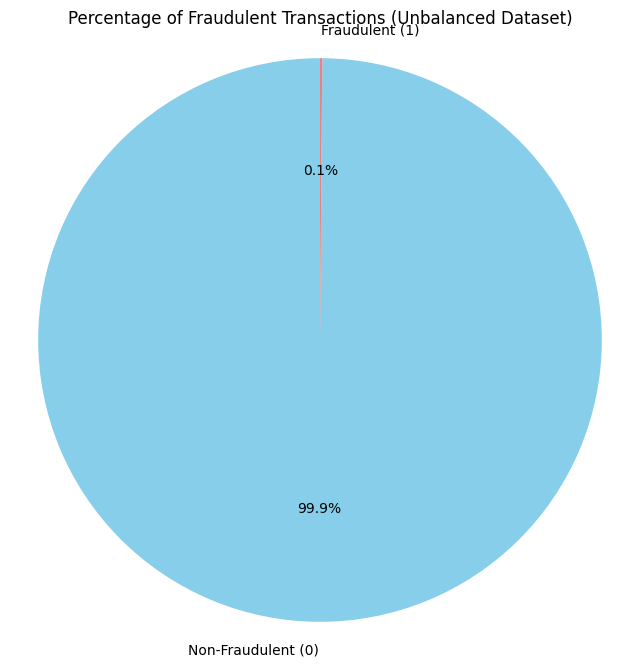

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of fraudulent and non-fraudulent transactions from the original dataframe
fraud_counts = df_original['isFraud'].value_counts()

print("Fraudulent vs Non-Fraudulent Transaction Counts:")
print(fraud_counts)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Fraudulent Transactions (Unbalanced Dataset)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()